In [ ]:
from logging import ERROR
import random
import json
import pickle
from google.protobuf import message

import numpy as np
from numpy.core.defchararray import mod
from numpy.lib.npyio import load

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# New Section

In [ ]:
lemmatizer=WordNetLemmatizer()
intents=json.loads(open('drive/MyDrive/chatbot/intents.json').read())

print(intents)

{'intents': [{'tag': 'noanswer', 'patterns': [''], 'responses': ['Mohon Maaf, saat ini aku hanya dapat menjawab mengenai Peraturan Daerah, Peraturan Gubernur dan Keputusan Gubernur saja.', 'Maaf, aku tidak mengerti. Bisa kamu ulangi?', 'Aku tidak yakin apa maksudmu']}, {'tag': 'greetings', 'patterns': ['hai', 'halo', 'permisi', 'hei', 'test', 'hi'], 'responses': ['Halo!, apa yang bisa aku bantu?', 'Hai, senang bertemu denganmu! ketik tanya jika kamu ingin bertanya.', 'Hai, ada yang bisa aku bantu?', 'Selamat datang di Peraturanku Bot! Apa yang bisa aku bantu?']}, {'tag': 'greetings2', 'patterns': ['assalamualaikum'], 'responses': ['Waalaikumsalam Wr. Wb.']}, {'tag': 'farewell', 'patterns': ['sampai nanti', 'selamat tinggal', 'sampai jumpa', 'bye'], 'responses': ['Sampai bertemu lain kali!', 'Sampai jumpa!', 'Selamat tinggal :)', 'Sedihnya harus berpisah:(']}, {'tag': 'thanks', 'patterns': ['trims', 'makasih', 'terimakasih', 'terima kasih', 'terima kasih sudah membantu', 'thanks', 'than

In [ ]:
words = []
classes = []
documents= []
ignore_letters = ["?","!",".",","]


for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore_letters]
words = sorted(set(words))
classes = sorted(set(classes))

print("Kata Unik/Token : " + str(len(words)))
print(words)
print("Kategori : " + str(len(classes)))
print(classes)

Kata Unik/Token : 132
['ada', 'aku', 'anak', 'anggaran', 'apa', 'apbd', 'assalamualaikum', 'bagaimana', 'baiklah', 'bangunan', 'bansos', 'bantu', 'bantuan', 'belanja', 'bencana', 'berapa', 'bermotor', 'bertanya', 'bisa', 'bpjs', 'buka', 'bumi', 'butuh', 'bye', 'cara', 'cari', 'corona', 'covid', 'covid19', 'cukup', 'daerah', 'dan', 'dapatkah', 'dari', 'dimana', 'disini', 'download', 'gimana', 'gubernur', 'hai', 'halo', 'hei', 'help', 'hi', 'hiburan', 'industri', 'ingin', 'ini', 'itu', 'iya', 'jaminan', 'jumpa', 'kamu', 'kapan', 'kasih', 'kekerasan', 'kendaraan', 'kepemudaan', 'kepgub', 'keputusan', 'kerja', 'kesehatan', 'kesejahteraan', 'ketenagakerjaan', 'ktp', 'lain', 'lakukan', 'lalu', 'lintas', 'maaf', 'maafkan', 'makasih', 'mana', 'mau', 'membantu', 'membantuku', 'mengenai', 'mengganggu', 'motor', 'mrt', 'nanti', 'nomor', 'ok', 'oke', 'olahraga', 'pajak', 'pariwisata', 'parkir', 'pasar', 'pegawai', 'pemuda', 'pendapatan', 'peraturan', 'peraturanku', 'perda', 'perempuan', 'pergub', 

In [ ]:
pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [ ]:
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training=np.array(training)

train_x = list(training[:, 0])
train_y = list(training[:, 1])

print("train_x = " + str(train_x[0]))
print("train_y = " + str(train_y[0]))

train_x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
train_y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]),activation='softmax'))

In [ ]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(np.array(train_x), np.array(train_y), epochs=300, batch_size=5, verbose=1)

Epoch 1/300
26/26 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.9219
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8984
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9531
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.9297
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8906
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.9453
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9453
Epoch 8/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9531
Epoch 9/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9453
Epoch 10/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9453
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               17024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                3250      
Total params: 28,530
Trainable params: 28,530
Non-trainable params: 0
_________________________________________________________________


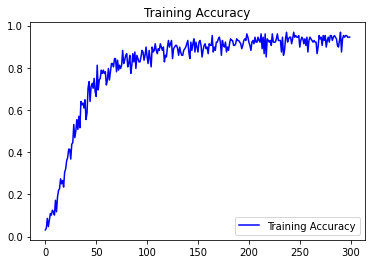

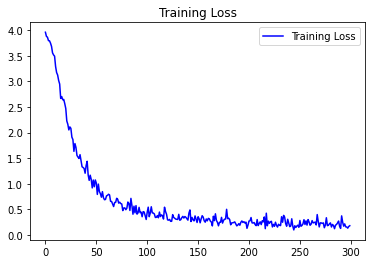

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
loss = hist.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')


plt.show()

In [ ]:
CHATBOT_MODEL = "chatbotmodel.h5"
model.save(CHATBOT_MODEL, hist)

In [ ]:
model = load_model('chatbotmodel.h5')

In [ ]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

In [ ]:
def bag_of_words(sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1

    return np.array(bag)

In [ ]:
def predict_class(sentence):
    bow = bag_of_words(sentence)
    res = model.predict(np.array([bow]))[0]
    ERROR_TRESHOLD = 0.25
    results = [[i,r]for i, r in enumerate(res) if r > ERROR_TRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intent': classes[r[0]],'probability': str(r[1])})
    return return_list

In [ ]:
def get_response(intents_list, intents_json):
    tag = intents_list[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result

In [ ]:
print("================================")
print("         PERATURANKU BOT        ")
print("================================")
print("      Type (stop) for exit!     ")
print(" ")

while True:
    message = input("YOU: ")
    if message.lower() == "stop":
        print("Terimakasih telah menggunakan Peraturanku Bot!")
        break
    
    ints = predict_class(message)
    res = get_response(ints, intents)
    print("BOT: " + res)

         PERATURANKU BOT        
      Type (stop) for exit!     
 
YOU: cari peraturan tentang lalu lintas dong!
BOT: Peraturan Daerah tentang Lalu Lintas dan Angkutan Jalan di Wilayah DKI Jakarta terdapat pada Peraturan Daerah Nomor 9 Tahun 1992. Silahkan kembali ke menu utama dan pilih Peraturan Daerah.
YOU: anjing
BOT: Mohon Maaf, saat ini aku hanya dapat menjawab mengenai Peraturan Daerah, Peraturan Gubernur dan Keputusan Gubernur saja.
YOU: perda soal kesehatan
BOT: Untuk memuat Peraturan Daerah silahkan kembali ke Menu Utama, lalu pilih Peraturan Daerah yang ingin kamu baca atau unduh.
YOU: cari peraturan tentang kesehatan
BOT: Peraturan Gubernur tentang Kepesertaan dan Pelayanan Jaminan Kesehatan terdapat pada Peraturan Gubernur Nomor 169 Tahun 2016. Silahkan kembali ke menu utama dan pilih Peraturan Gubernur.
YOU: stop
Terimakasih telah menggunakan Peraturanku Bot!


In [ ]:
import tensorflow as tf

tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()

with open('chatbot.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpeyg8nc3_/assets
